In [1]:
import tensorflow as tf
from keras import layers
import time

In [2]:
def create_generator():
    model = tf.keras.Sequential()

    # creating Dense layer with units 7*7*256(batch_size) and input_shape of (100,)
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model


def create_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


def D_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


def G_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [3]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = G_loss(fake_output)
        disc_loss = D_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


def train_GAN(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))


In [4]:
BATCH_SIZE = 256
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(BATCH_SIZE)


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
noise_dim = 100
num_of_generated_examples = 16
seed = tf.random.normal([num_of_generated_examples, noise_dim])

generator = create_generator()
discriminator = create_discriminator()

In [6]:
train_GAN(train_dataset, 200)

2023-04-27 09:46:18.511999: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-04-27 09:46:44.042655: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Time for epoch 1 is 28.08814024925232 sec
Time for epoch 2 is 10.407099962234497 sec
Time for epoch 3 is 10.508828401565552 sec
Time for epoch 4 is 10.591501474380493 sec
Time for epoch 5 is 10.67694616317749 sec
Time for epoch 6 is 10.755019426345825 sec
Time for epoch 7 is 10.863212823867798 sec
Time for epoch 8 is 10.953659057617188 sec
Time for epoch 9 is 11.03957986831665 sec
Time for epoch 10 is 11.090578556060791 sec
Time for epoch 11 is 11.178907632827759 sec
Time for epoch 12 is 11.258885622024536 sec
Time for epoch 13 is 11.357739686965942 sec
Time for epoch 14 is 11.408216714859009 sec
Time for epoch 15 is 11.466675996780396 sec
Time for epoch 16 is 11.427468061447144 sec
Time for epoch 17 is 11.403780460357666 sec
Time for epoch 18 is 11.378208875656128 sec
Time for epoch 19 is 11.379432439804077 sec
Time for epoch 20 is 11.371322870254517 sec
Time for epoch 21 is 11.374218463897705 sec
Time for epoch 22 is 11.387179136276245 sec
Time for epoch 23 is 11.396219253540039 sec


Noise [ 1.0982145   2.1961722   0.6866923  -0.27126715  0.33231124 -0.630717
  0.9315837  -0.28672633 -1.1671131   0.8087959  -0.37488645  0.4365826
  0.25609207 -0.01953959 -0.27642655 -0.82195383  1.7038753  -0.6332247
 -0.55460495 -0.10492827  0.19319893 -0.78792363  1.6729579   0.7107588
  0.8921842   0.39711663 -0.6330374   3.0441165   0.02111018  1.5596145
  0.8001285   1.4506109   0.20424372 -0.08108435 -0.41118684  0.01682074
  0.65140903  0.87946147  0.4958421   0.918168   -0.62222767 -1.190378
 -0.08648931  0.60473734  0.91865206 -0.01975585 -0.11078034  0.56015325
  1.117106    0.3521702   0.587302    1.2891347   0.47522897  0.33475047
  1.1126672  -1.8678429   0.872827   -0.7239569   0.13874516  0.5801944
  0.9053133  -1.260429   -0.8401347   0.02293327 -1.6766617  -1.0448922
 -1.6524032   1.5854516   0.84809315  1.346826    1.6071507   0.3972333
 -1.7921726   1.6664923   0.4164398   0.27564913 -0.4429608   0.3215929
 -0.3772304   0.00350178  0.7873033   1.9378421  -1.33292

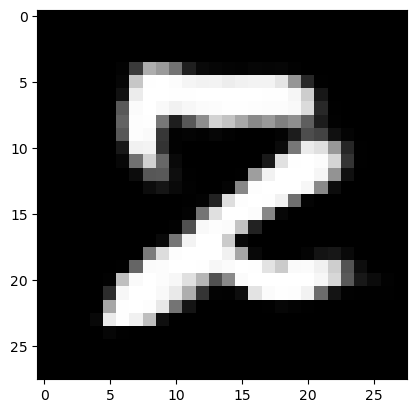

In [17]:
noise = tf.random.normal([BATCH_SIZE, noise_dim])
generated_images = generator(noise, training=True)
# print(generated_images)
import matplotlib.pyplot as plt
print(f"Noise {noise[5,:]}")
plt.imshow(generated_images[5,:,:,:], cmap="gray")